In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


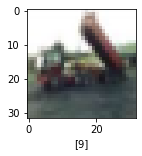

In [16]:
plot_sample(x_train,y_train,2)

In [17]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [41]:
#model
cnn=models.Sequential()

#feature extraction
cnn.add(layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D(2,2))
                       
cnn.add(layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
cnn.add(layers.MaxPooling2D(2,2))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10))


In [42]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [43]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [49]:
cnn.fit(x_train,y_train,epochs=25,validation_data=(x_train,y_train))

Epoch 1/25
1563/1563 [==============================] - 82s 53ms/step - loss: 1.7907 - accuracy: 0.3545 - val_loss: 1.7640 - val_accuracy: 0.3656
Epoch 2/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.7422 - accuracy: 0.3776 - val_loss: 1.7306 - val_accuracy: 0.3830
Epoch 3/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6917 - accuracy: 0.3981 - val_loss: 1.6597 - val_accuracy: 0.4088
Epoch 4/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6682 - accuracy: 0.4069 - val_loss: 1.6487 - val_accuracy: 0.4138
Epoch 5/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6470 - accuracy: 0.4147 - val_loss: 1.6317 - val_accuracy: 0.4214
Epoch 6/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6369 - accuracy: 0.4198 - val_loss: 1.6168 - val_accuracy: 0.4293
Epoch 7/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6221 - accuracy: 0.4243 - val_loss: 1.6213 -

In [50]:
y_pred=cnn.predict(x_test)

In [51]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.4817 - accuracy: 0.4809


[1.4817278385162354, 0.48089998960494995]

In [53]:
y_test=y_test.reshape(-1)
y_pred=cnn.predict(x_test)

In [54]:
y_classes=[np.argmax(element) for element in y_pred]
print("classification report :\n",classification_report(y_test,y_classes))

classification report :
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      1000
           1       0.59      0.56      0.58      1000
           2       0.39      0.37      0.38      1000
           3       0.35      0.19      0.25      1000
           4       0.41      0.46      0.43      1000
           5       0.45      0.39      0.42      1000
           6       0.52      0.55      0.53      1000
           7       0.46      0.62      0.53      1000
           8       0.50      0.59      0.54      1000
           9       0.54      0.49      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000

